In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

In [392]:
df = pd.read_csv('test.csv')


In [393]:
df.head()

,age,Gender,chest_pain_type,blood_pressure_level,cholesterol_level,blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,ID
0,64,Male,Asymptomatic,120,246,0,0,96,1,2.2,0,1,2,756
1,57,Male,Asymptomatic,110,201,0,1,126,1,1.5,1,0,1,353
2,60,Male,Asymptomatic,130,206,0,0,132,1,2.4,1,2,3,929
3,57,Male,Asymptomatic,140,192,0,1,148,0,0.4,1,0,1,129
4,63,Female,Asymptomatic,108,269,0,1,169,1,1.8,1,2,2,591


In [394]:
df.tail()

,age,Gender,chest_pain_type,blood_pressure_level,cholesterol_level,blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,ID
200,67,Male,Asymptomatic,120,237,0,1,71,0,1.0,1,0,2,378
201,46,Male,Asymptomatic,140,311,0,1,120,1,1.8,1,2,3,218
202,56,Male,Asymptomatic,132,184,0,0,105,1,2.1,1,1,1,564
203,54,Female,Non-anginal Pain,160,201,0,1,163,0,0.0,2,1,2,426
204,55,Male,Atypical Angina,130,262,0,1,155,0,0.0,2,0,2,904


In [395]:
df.shape

(205, 14)

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   205 non-null    int64  
 1   Gender                205 non-null    object 
 2   chest_pain_type       205 non-null    object 
 3   blood_pressure_level  205 non-null    int64  
 4   cholesterol_level     205 non-null    int64  
 5   blood_sugar           205 non-null    int64  
 6   restecg               205 non-null    int64  
 7   thalach               205 non-null    int64  
 8   exang                 205 non-null    int64  
 9   oldpeak               205 non-null    float64
 10  slope                 205 non-null    int64  
 11  ca                    205 non-null    int64  
 12  thal                  205 non-null    int64  
 13  ID                    205 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 22.6+ KB


In [397]:
df.describe()

,age,blood_pressure_level,cholesterol_level,blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,ID
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,53.712195,128.663415,238.263415,0.131707,0.590244,148.058537,0.321951,1.045854,1.434146,0.790244,2.258537,528.853659
std,8.925624,15.274254,51.536860,0.339000,0.540427,24.617595,0.468368,1.153573,0.587288,1.066377,0.676270,292.566279
min,35.000000,94.000000,141.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,47.000000,120.000000,201.000000,0.000000,0.000000,130.000000,0.000000,0.000000,1.000000,0.000000,2.000000,285.000000
50%,55.000000,130.000000,234.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,538.000000
75%,60.000000,140.000000,265.000000,0.000000,1.000000,168.000000,1.000000,1.800000,2.000000,1.000000,3.000000,765.000000
max,76.000000,180.000000,564.000000,1.000000,2.000000,190.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1024.000000


Finding the missing values in the dataset.

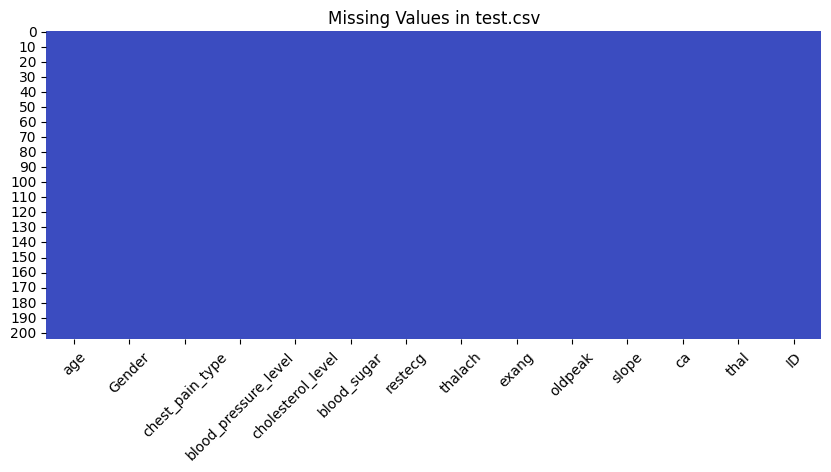

In [398]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Values in test.csv')
plt.xticks(rotation=45)
plt.show()

This graphs tells us that we do not have the missing values in the dataset

Now we are checking the duplicate things in the dataset

In [399]:
if 'ID' in df.columns:
    print("Duplicate IDs:", df['ID'].duplicated().sum())
else:
    print("Duplicate rows:", df.duplicated().sum())


Duplicate IDs: 0


Checking the numeric values in the dataset except id and index

In [400]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c.lower() not in ('id','index')]
print("Numeric columns:", num_cols)

Numeric columns: ['age', 'blood_pressure_level', 'cholesterol_level', 'blood_sugar', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


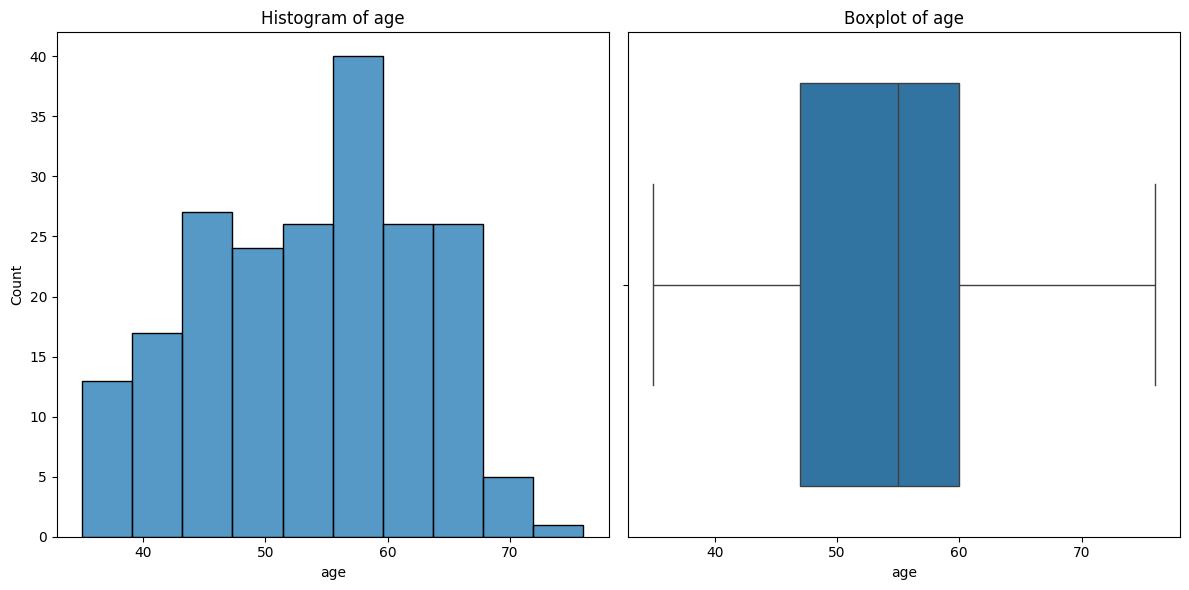

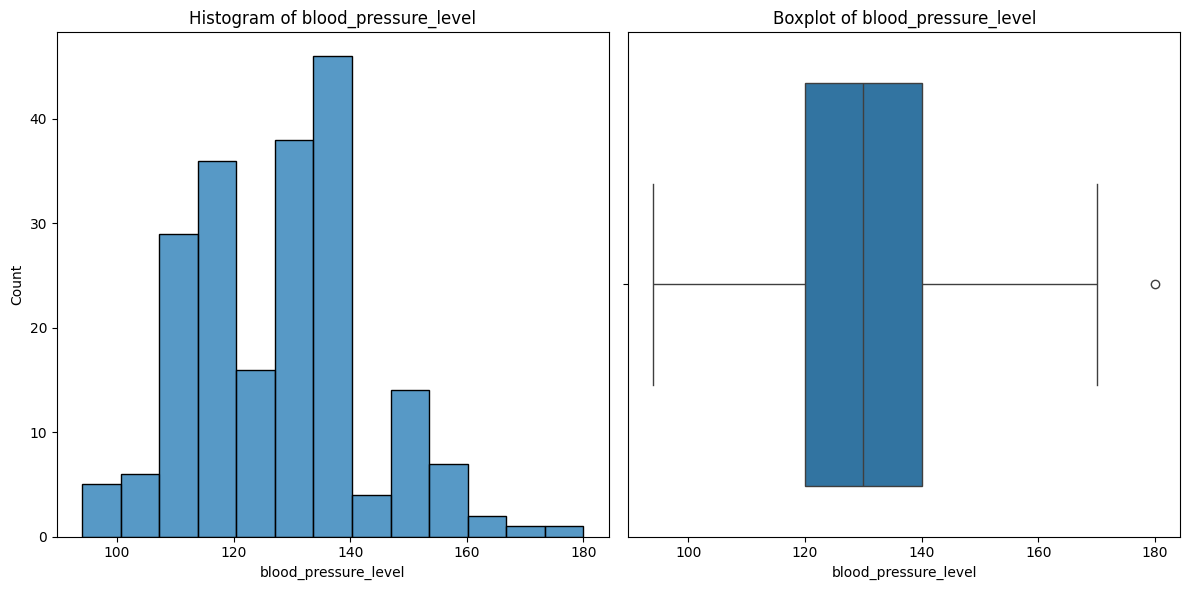

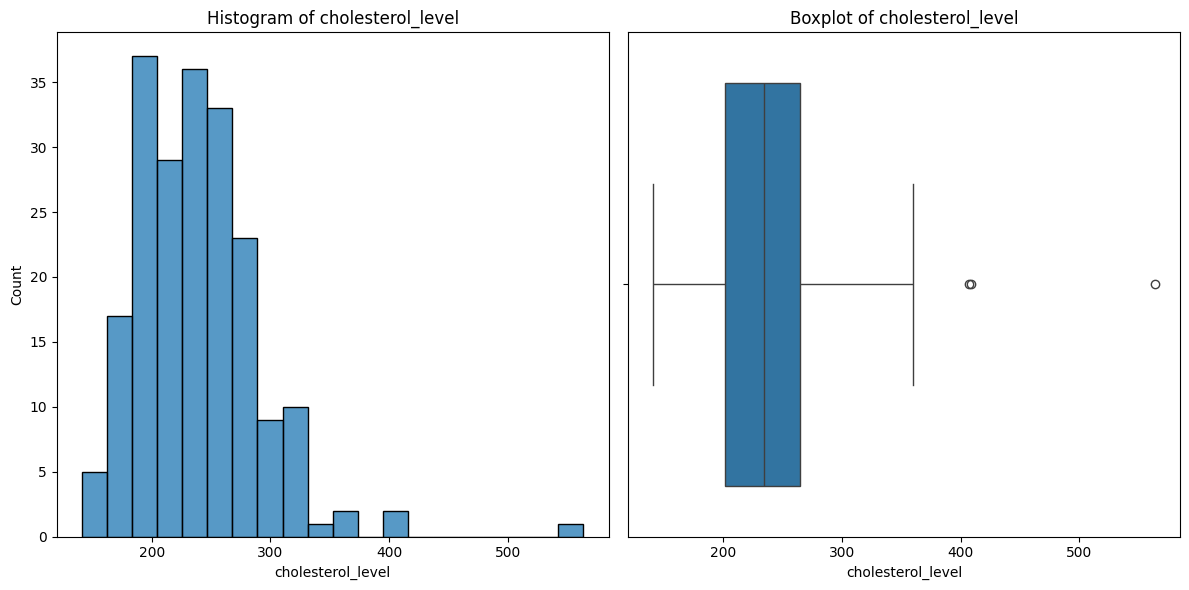

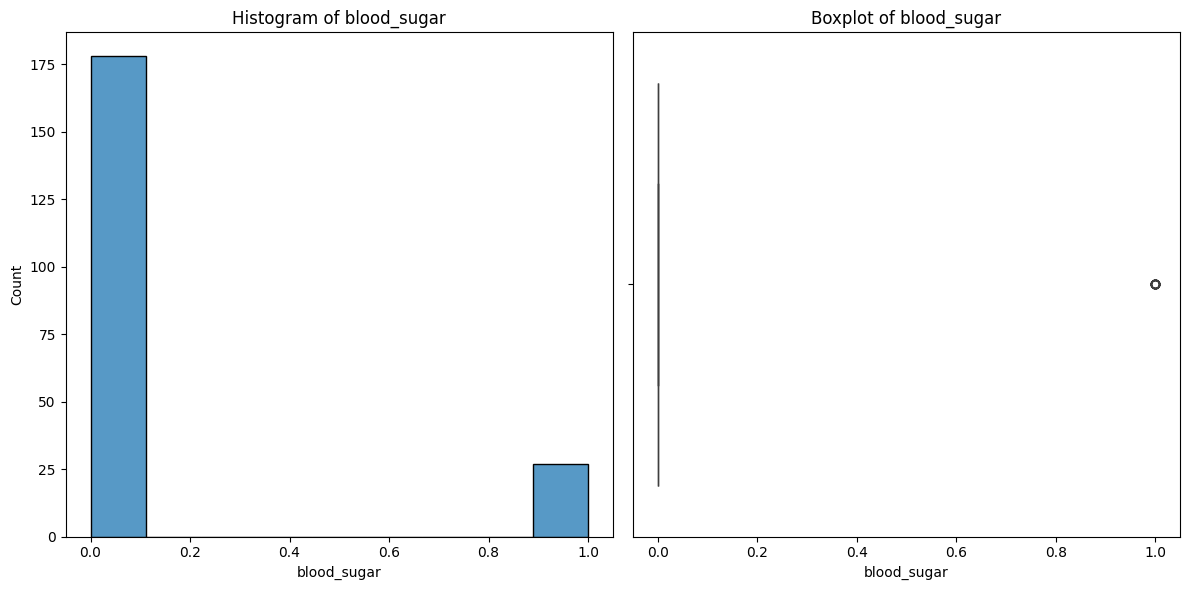

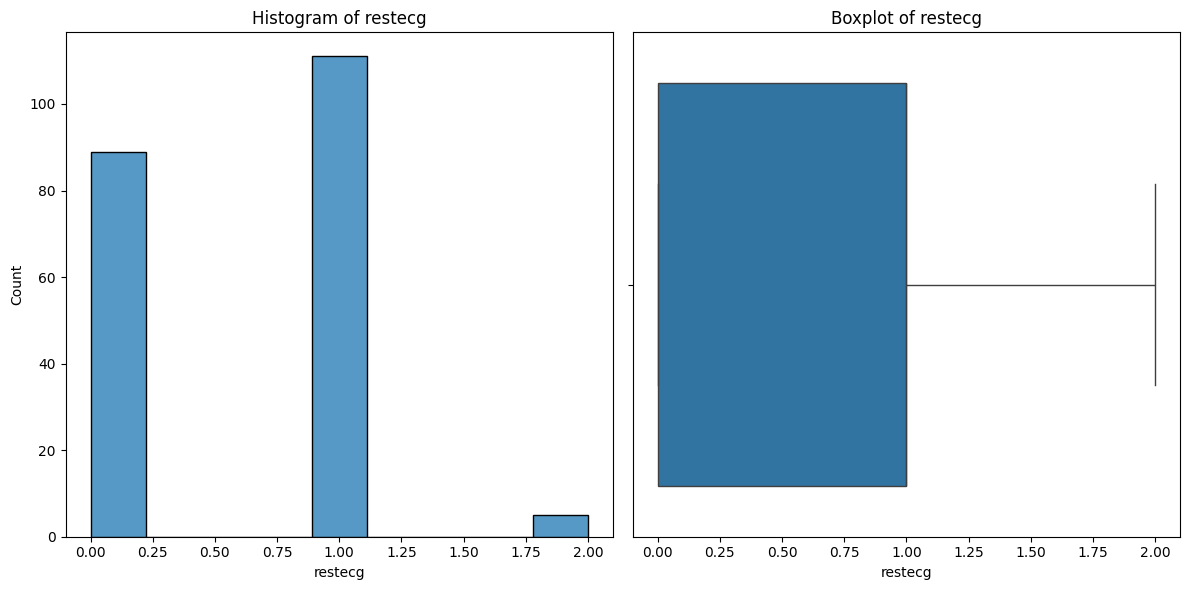

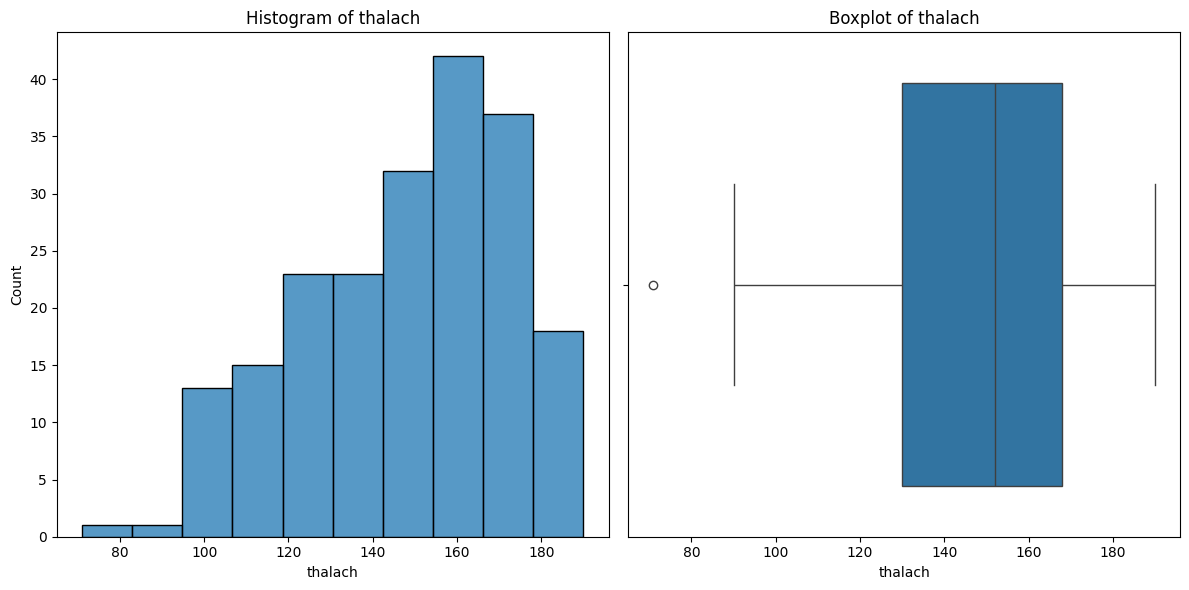

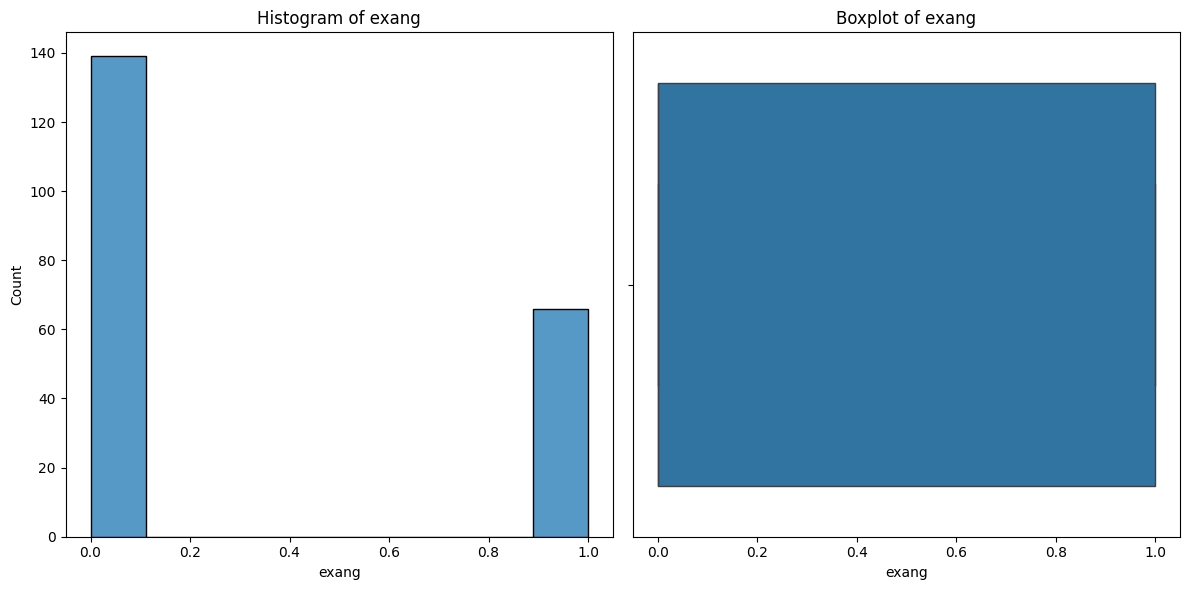

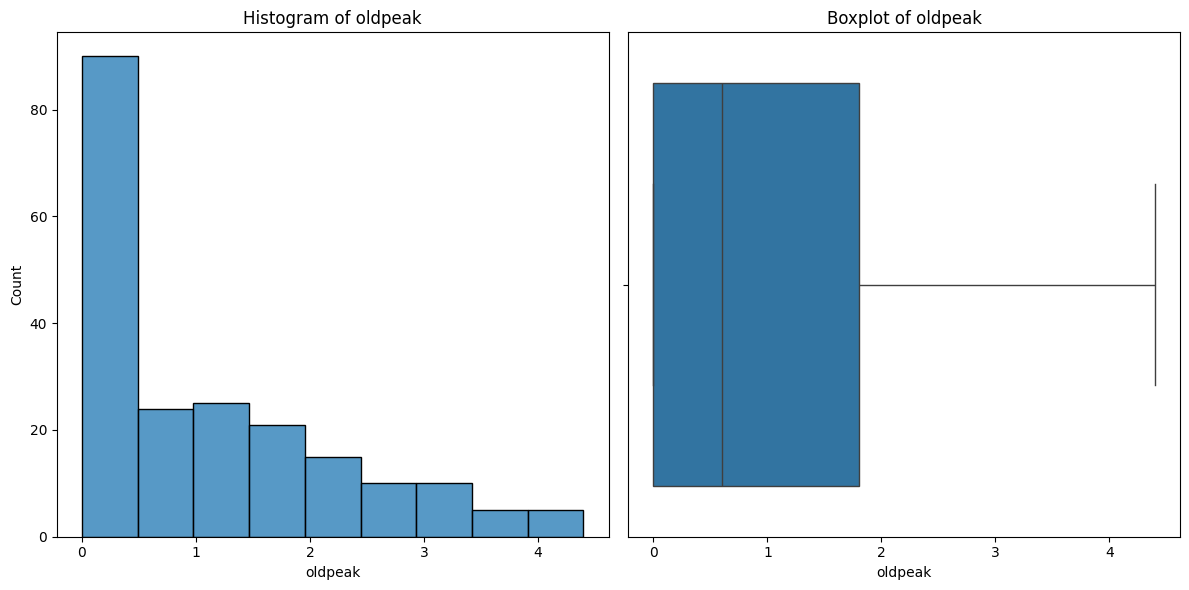

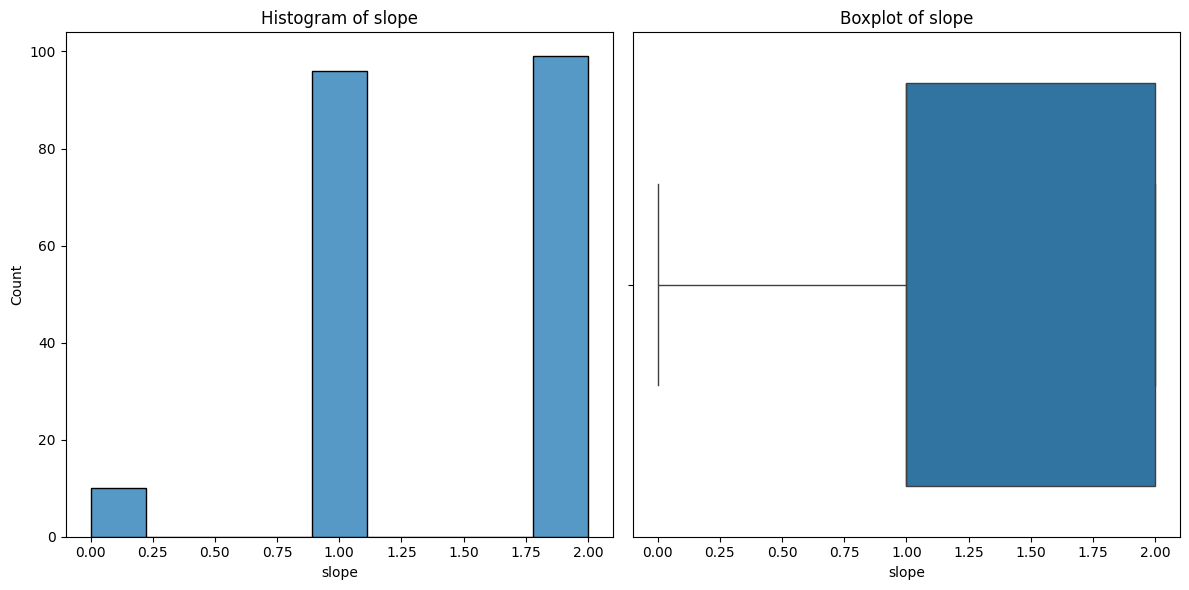

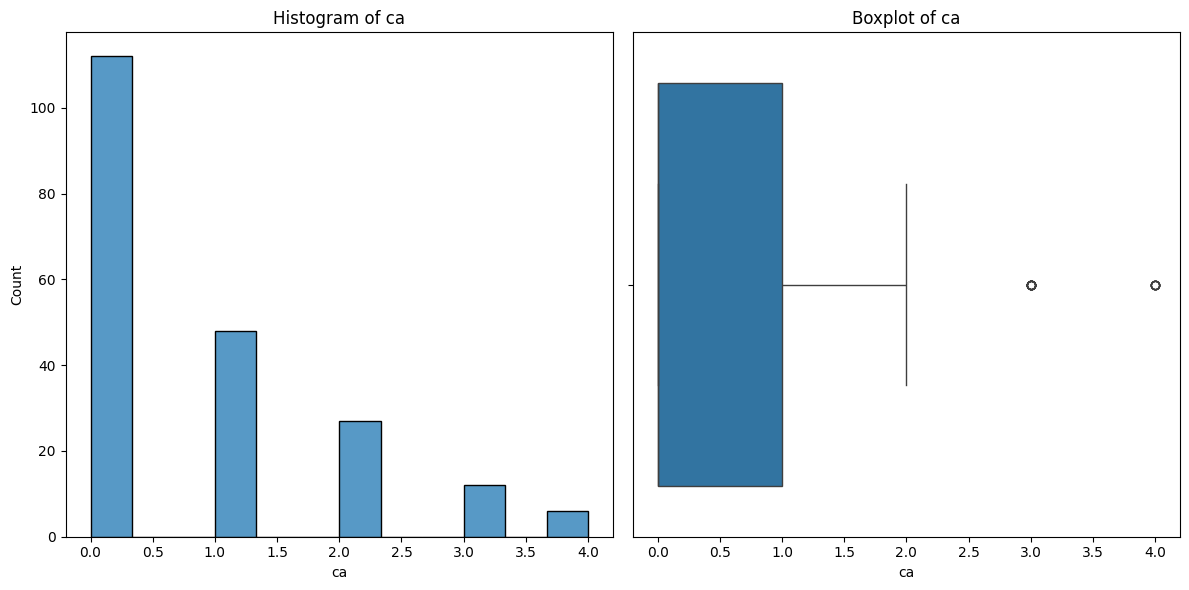

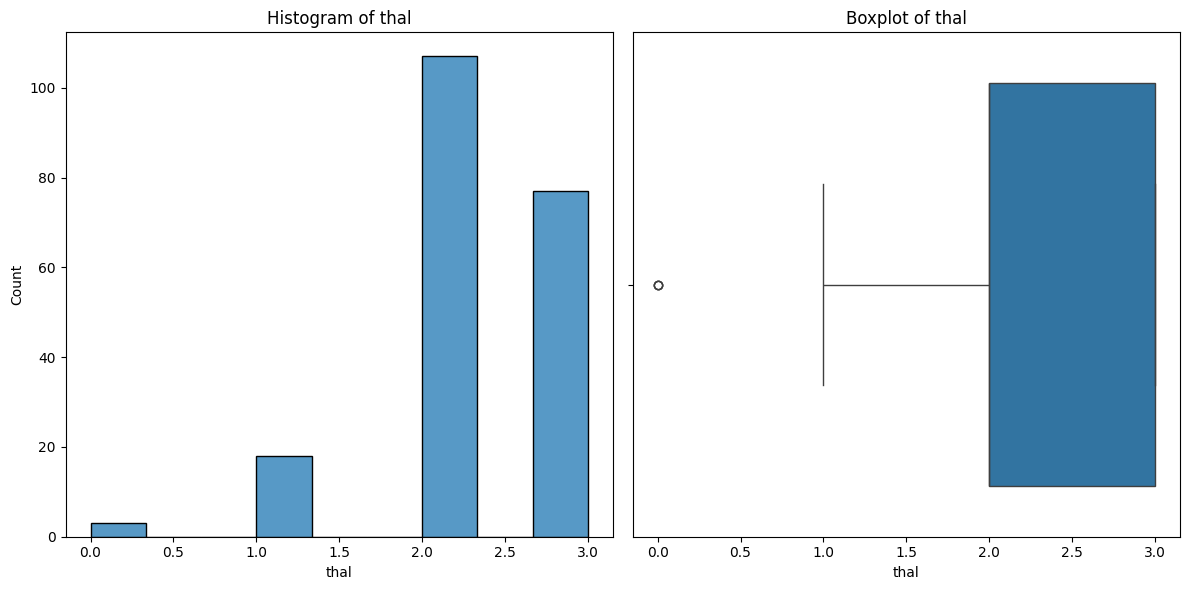

In [401]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.histplot(df[col], ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

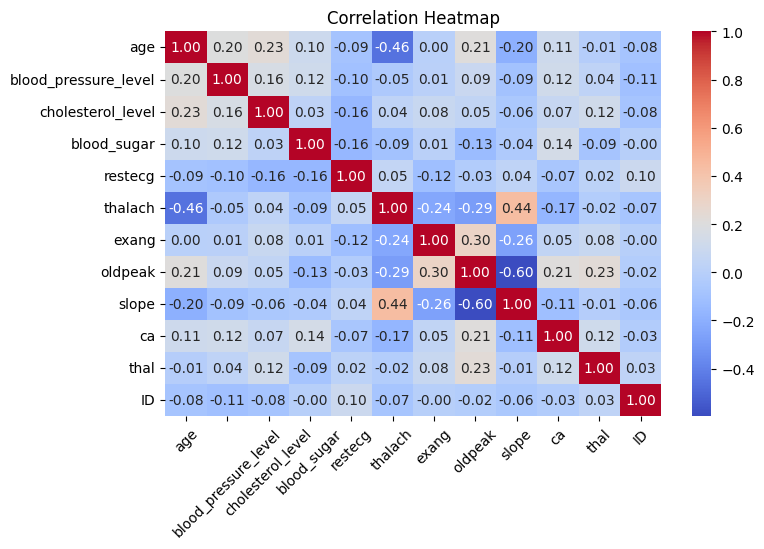

In [402]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

Doing Encoding Label Encoder on Gender, Chest Pain, restecg, exang, slope and thal

In [403]:
from sklearn.preprocessing import LabelEncoder

L = LabelEncoder()
columns_to_encode_ord = ['Gender', 'chest_pain_type', 'restecg', 'exang', 'slope', 'thal']
columns_to_encode_actual = [
    col for col in columns_to_encode_ord
    if col in df.columns and df[col].dtype == 'object'
]
for col in columns_to_encode_actual:
    df[col] = L.fit_transform(df[col])

In [404]:
df.head(10)

,age,Gender,chest_pain_type,blood_pressure_level,cholesterol_level,blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,ID
0,64,1,0,120,246,0,0,96,1,2.2,0,1,2,756
1,57,1,0,110,201,0,1,126,1,1.5,1,0,1,353
2,60,1,0,130,206,0,0,132,1,2.4,1,2,3,929
3,57,1,0,140,192,0,1,148,0,0.4,1,0,1,129
4,63,0,0,108,269,0,1,169,1,1.8,1,2,2,591
5,61,1,0,138,166,0,0,125,1,3.6,1,1,2,633
6,40,1,3,140,199,0,1,178,1,1.4,2,0,3,314
7,56,1,2,130,256,1,0,142,1,0.6,1,1,1,717
8,50,0,1,120,244,0,1,162,0,1.1,2,0,2,31
9,57,1,0,110,201,0,1,126,1,1.5,1,0,1,887


Now we are applying one hot encoding label

In [405]:
columns_to_encode_ohe = ['Gender', 'chest_pain_type', 'blood_sugar', 'restecg', 'exang', 'slope', 'ca', 'thal']

existing_cols_to_ohe = [col for col in columns_to_encode_ohe if col in df.columns]

if existing_cols_to_ohe:
    df = pd.get_dummies(df, columns=existing_cols_to_ohe, drop_first=True, dtype=int)


In [406]:
df.head()

,age,blood_pressure_level,cholesterol_level,thalach,oldpeak,ID,Gender_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,64,120,246,96,2.2,756,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,57,110,201,126,1.5,353,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,60,130,206,132,2.4,929,1,0,0,0,...,1,1,0,0,1,0,0,0,0,1
3,57,140,192,148,0.4,129,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,63,108,269,169,1.8,591,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0


In [407]:
df.columns.tolist()

['age',
 'blood_pressure_level',
 'cholesterol_level',
 'thalach',
 'oldpeak',
 'ID',
 'Gender_1',
 'chest_pain_type_1',
 'chest_pain_type_2',
 'chest_pain_type_3',
 'blood_sugar_1',
 'restecg_1',
 'restecg_2',
 'exang_1',
 'slope_1',
 'slope_2',
 'ca_1',
 'ca_2',
 'ca_3',
 'ca_4',
 'thal_1',
 'thal_2',
 'thal_3']

Splitting The Dataset in Train and Test

In [408]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [409]:
X_train.shape

(164, 21)

In [410]:
X_test.shape

(41, 21)

In [411]:
y_train.shape

(164,)

In [412]:
y_test.shape

(41,)

In Normalization we are Applying MinMax Scaler


In [413]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression


In [414]:
from sklearn.linear_model import LogisticRegression

L = LogisticRegression()
L.fit(X_train, y_train)
y_pred_logistic = L.predict(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [415]:
y_pred_prob_logistic = L.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


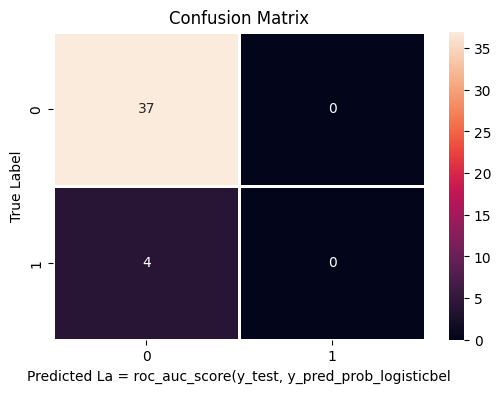

Accurcy Score of Logistic Regression: 0.90244
AUC of Logistic Regression: 0.73649
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        37
           1       0.00      0.00      0.00         4

    accuracy                           0.90        41
   macro avg       0.45      0.50      0.47        41
weighted avg       0.81      0.90      0.86        41



In [416]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

acc_logistic = accuracy_score(y_test, y_pred_logistic)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
auc_logistic = roc_auc_score(y_test, y_pred_prob_logistic)
cr_logistic = classification_report(y_test, y_pred_logistic)

plt.figure(figsize=(6,4))
sns.heatmap(cm_logistic, annot=True, fmt='d', linewidths=1)
plt.xlabel("Predicted La = roc_auc_score(y_test, y_pred_prob_logisticbel")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(f"Accurcy Score of Logistic Regression: {acc_logistic:.5f}")
print(f"AUC of Logistic Regression: {auc_logistic:.5f}")
print(cr_logistic)

ROC Curves and AUC Values

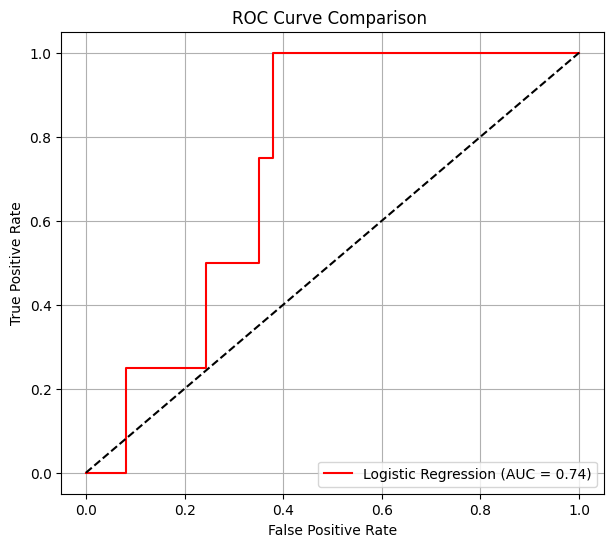

In [417]:
from sklearn.metrics import roc_curve, auc
log_prob = L.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, log_prob)

auc_log = auc(fpr_log, tpr_log)

plt.figure(figsize=(7,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', color='red')
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison ')
plt.legend()
plt.grid(True)
plt.show()

Feature Importance

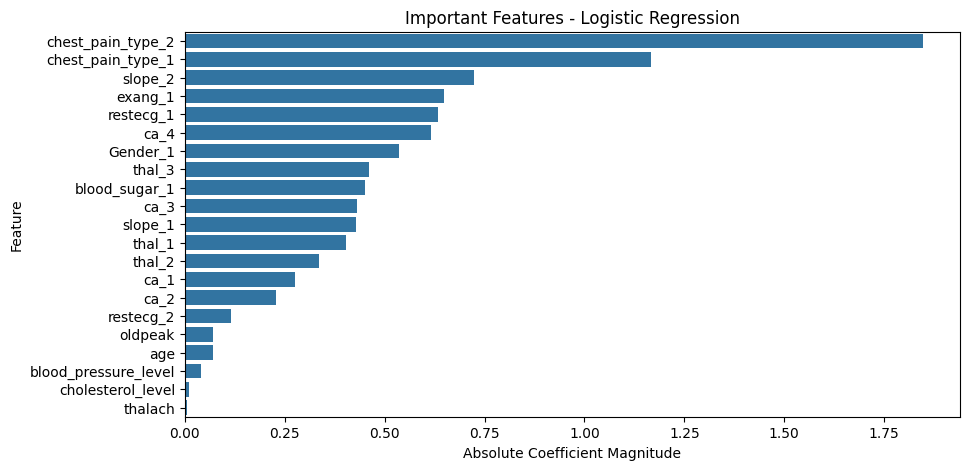

In [418]:
feature_names = X.columns
log_importance = np.abs(L.coef_[0])
log_feat_imp = pd.Series(log_importance, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=log_feat_imp.values, y=log_feat_imp.index)
plt.title("Important Features - Logistic Regression")
plt.xlabel("Absolute Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

Random Forest Regressor

In [419]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train)
y_pred_random = RF.predict(X_test)

In [420]:
y_pred_prob_random = RF.predict_proba(X_test)[:,1]

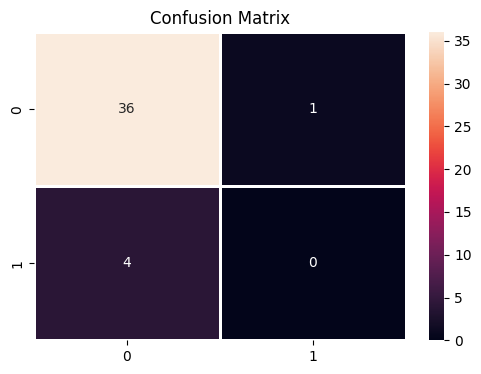

Accurcy Score of Random Forest Classifier: 0.87805
AUC of Random Forest Classifier: 0.74662
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        37
           1       0.00      0.00      0.00         4

    accuracy                           0.88        41
   macro avg       0.45      0.49      0.47        41
weighted avg       0.81      0.88      0.84        41



In [421]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

acc_random = accuracy_score(y_test, y_pred_random)
cm_random = confusion_matrix(y_test, y_pred_random)
auc_random = roc_auc_score(y_test, y_pred_prob_random)
cr_random = classification_report(y_test, y_pred_random)

plt.figure(figsize=(6,4))
sns.heatmap(cm_random, annot=True, fmt='d', linewidths=1)
plt.title("Confusion Matrix")
plt.show()

print(f"Accurcy Score of Random Forest Classifier: {acc_random:.5f}")
print(f"AUC of Random Forest Classifier: {auc_random:.5f}")
print(cr_random)

ROC Curve and AUC Values

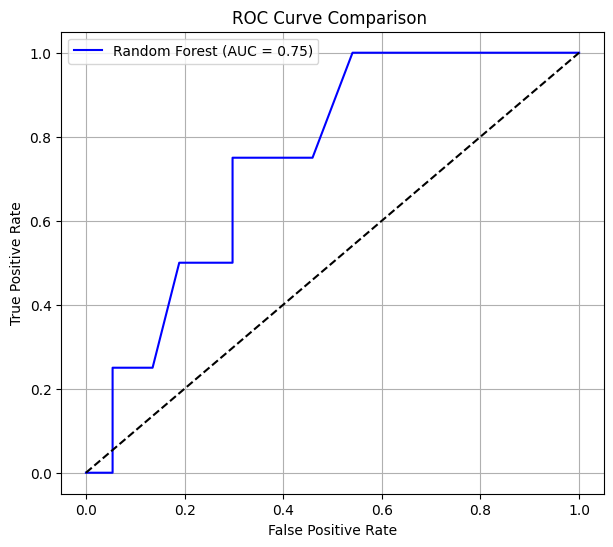

In [422]:
RF_prob = RF.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, RF_prob)

auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(7,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='blue')
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison ')
plt.legend()
plt.grid(True)
plt.show()

Feature Importance

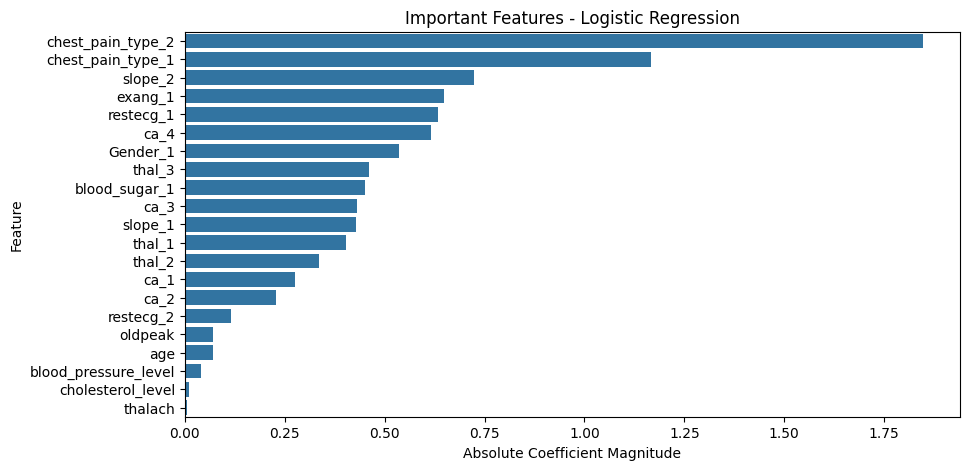

In [423]:
feature_names = X.columns
log_importance = np.abs(L.coef_[0])
log_feat_imp = pd.Series(log_importance, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=log_feat_imp.values, y=log_feat_imp.index)
plt.title("Important Features - Logistic Regression")
plt.xlabel("Absolute Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

XG Boost

In [424]:
XG = XGBClassifier(n_estimators=100)
XG.fit(X_train, y_train)
y_pred_random = XG.predict(X_test)

In [425]:
y_pred_prob_random = XG.predict_proba(X_test)[:,1]

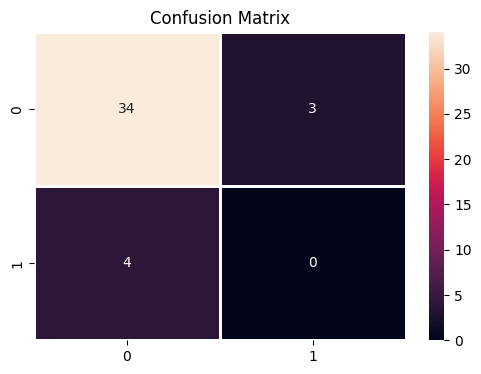

Accurcy Score of XGB Classifier: 0.82927
AUC of XGB Classifier: 0.77703
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.00      0.00      0.00         4

    accuracy                           0.83        41
   macro avg       0.45      0.46      0.45        41
weighted avg       0.81      0.83      0.82        41



In [426]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

acc_random = accuracy_score(y_test, y_pred_random)
cm_random = confusion_matrix(y_test, y_pred_random)
auc_random = roc_auc_score(y_test, y_pred_prob_random)
cr_random = classification_report(y_test, y_pred_random)

plt.figure(figsize=(6,4))
sns.heatmap(cm_random, annot=True, fmt='d', linewidths=1)
plt.title("Confusion Matrix")
plt.show()

print(f"Accurcy Score of XGB Classifier: {acc_random:.5f}")
print(f"AUC of XGB Classifier: {auc_random:.5f}")
print(cr_random)

ROC Curve and AUC Values

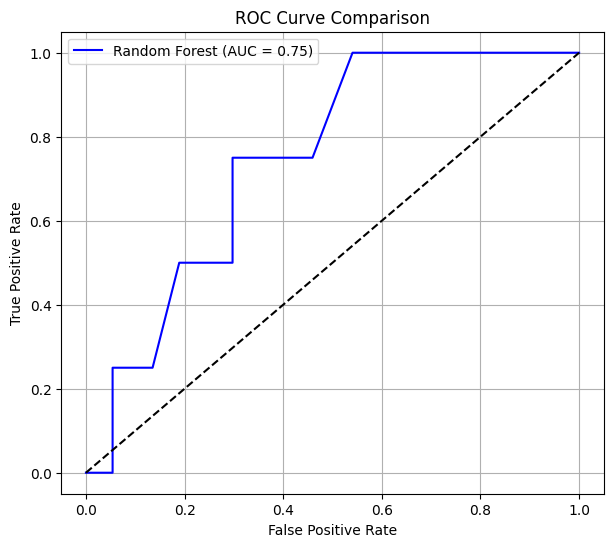

In [427]:
xgb_prob = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)
auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(7,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='blue')
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

Feature Importance

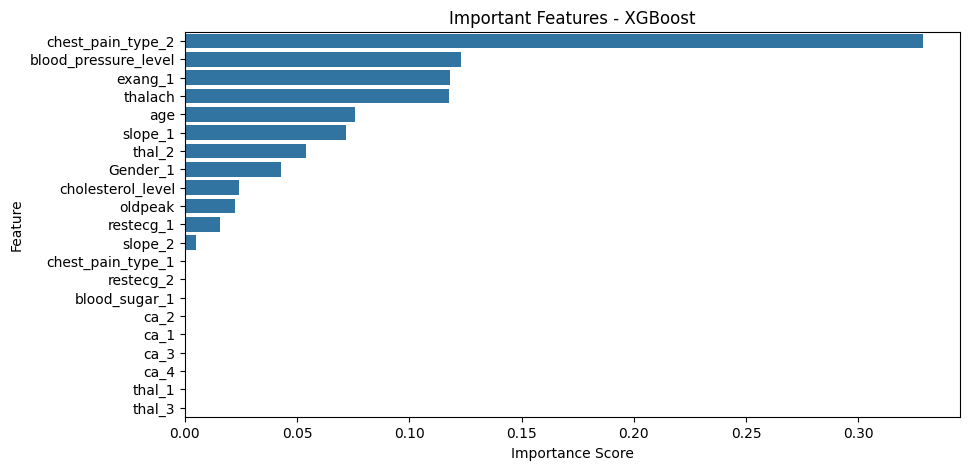

In [428]:
xgb_feat_imp = pd.Series(xgb.feature_importances_, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=xgb_feat_imp.values, y=xgb_feat_imp.index)
plt.title("Important Features - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
